In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("salaries.csv")

In [3]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
dfle=df
dfle.company=le.fit_transform(df.company)
dfle.job=le.fit_transform(df.job)
dfle.degree=le.fit_transform(df.degree)
dfle

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [6]:
X=dfle.drop('salary_more_then_100k',axis='columns')
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
y=dfle.salary_more_then_100k.values
y

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn import tree
model=tree.DecisionTreeClassifier()


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=model.predict(X_test)

In [18]:
model.predict([[2,1,0]])

C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [11]:
model.score(X,y)

1.0

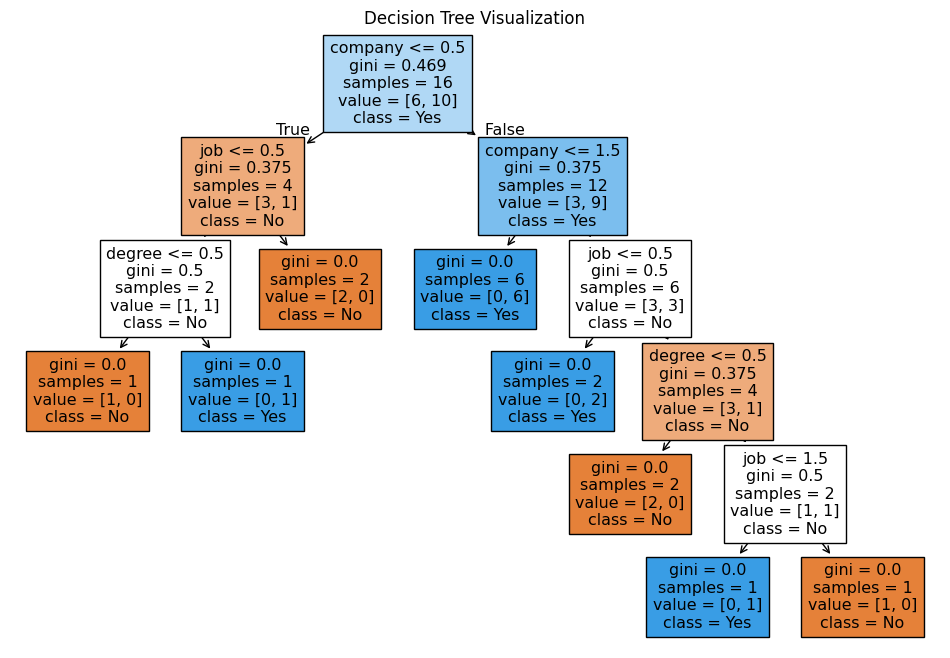

In [12]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=['company', 'job', 'degree'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

